In [1]:
import pandas as pd  
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mp  
import math  
%matplotlib inline

In [3]:
df = pd.DataFrame ( {
    'male height': np.random.normal(172, 20, 101),
    'female height': np.random.normal(166, 20, 101),
}) 

df.head(7)

,male height,female height
0,167.933673,166.157630
1,140.830589,166.745688
2,177.585351,151.672616
3,146.667206,165.256735
4,182.595579,145.366116
5,170.441323,184.175633
6,205.490190,178.069230


[Text(0.5, 0, 'random')]

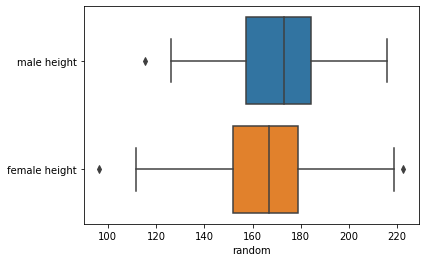

In [5]:
sns.boxplot(data = df, orient = 'h').set(xlabel='random')

In [7]:
def levene(data):
    df = len(data) - 1
    std1 = np.std(data.iloc[:,0])
    std2 = np.std(data.iloc[:,1])
    F = std1**2/std2**2 if(std1 > std2) else std2**2/std1**2
    krit_levene = pd.read_excel("Лівеня.xlsx")
    if (df > 20):
        F_table = krit_levene.iloc[21,12]
    elif (df > 15):
        F_table = krit_levene.iloc[df,11]
    elif (df > 15):
        F_table = krit_levene.iloc[df,10]
    else:
        F_table = krit_levene.iloc[df,df]
    return df, F, "Significiant" if (F < F_table) else "Not significant"

In [8]:
def student(data, liven_sig):
    mean1 = np.mean(data.iloc[:,0])
    mean2 = np.mean(data.iloc[:,1])
    std1 = np.std(data.iloc[:,0])
    std2 = np.std(data.iloc[:,1])
    n = len(data)
    df = n+n-2
    if (liven_sig == "Significiant"):
        t = abs(mean1 - mean2)/np.sqrt(std1**2/n + std2**2/n)
    else:
        t = abs(mean1 - mean2)/np.sqrt((((n-1)*std1**2+(n-1)*std2**2)/df) * (1/n + 1/n))
    student_table = pd.read_excel("Стьюдента.xlsx")
    table_t = 0
    for i in range(len(student_table)):
        if(df < int(student_table.iloc[i,0])):
            if(df != student_table.iloc[i-1,0]):
                if((student_table.iloc[i,0]-df) >= abs(student_table.iloc[i-1,0]-df)):
                    table_t = student_table.iloc[i-1,1]
                else: 
                    table_t = student_table.iloc[i,1]
                break
            else:
                table_t = student_table.iloc[i-1,1]
                break
    return df, t, "Significiant" if (t < table_t) else "Not significant"

In [9]:
levene(df)


(100, 1.172826039830687, 'Significiant')

In [10]:
student(df, levene(df)[2])

(200, 2.085096224761883, 'Not significant')